In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

%matplotlib inline
sns.set()

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

In [46]:
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=False, random_state=42)

In [47]:
faces.shape

(400, 4096)

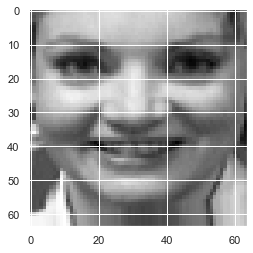

In [129]:
image_shape = (64, 64)
plt.imshow(faces[340].reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')

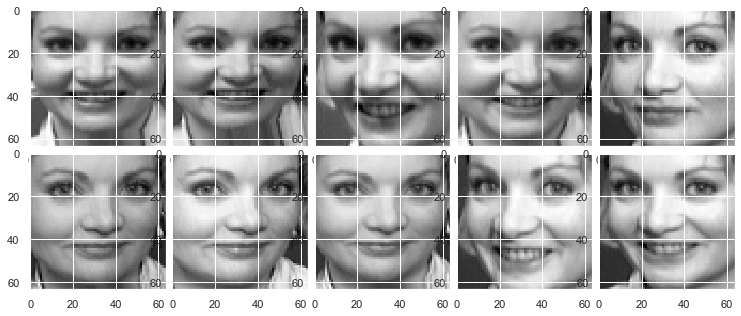

In [130]:
def plot_gallery(images, n_col=5, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray, interpolation='nearest')
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

plot_gallery(faces[340:350])

In [134]:
kmeans = MiniBatchKMeans(
    init_size=120, 
    n_clusters=10, 
    batch_size=6, 
    max_iter=100,
    verbose=0,
    random_state=42).fit(faces)

In [135]:
centroids = kmeans.cluster_centers_

In [136]:
pca = PCA(n_components=2)
faces_pca = pca.fit_transform(faces)
df_faces_pca = pd.DataFrame({
    'P1':[p[0] for p in faces_pca],
    'P2':[p[1] for p in faces_pca]
})

centroids_pca = pca.transform(centroids)
df_centroids_pca = pd.DataFrame({
    'P1':[p[0] for p in centroids_pca],
    'P2':[p[1] for p in centroids_pca]
})

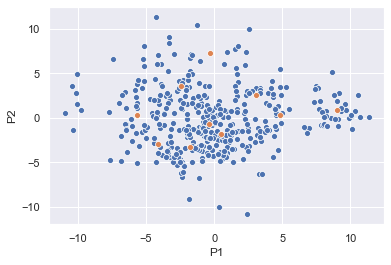

In [137]:
sns.scatterplot(data=df_faces_pca, x='P1', y='P2')
sns.scatterplot(data=df_centroids_pca, x='P1', y='P2')

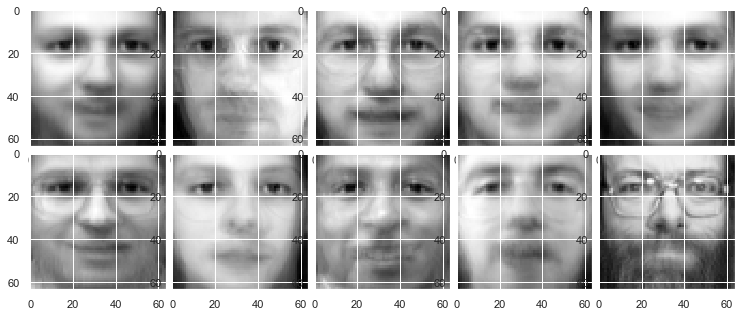

In [138]:
plot_gallery(centroids[0:10])